In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('timeseries.csv')
df.head()

,Months,Monthly Sales
0,"2020,5",13865
1,"2020,6",51274
2,"2020,7",97768
3,"2020,8",113033
4,"2020,9",147912


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Months         22 non-null     object
 1   Monthly Sales  22 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [8]:
df['Months']=df['Months'].str.replace(',','-')

In [9]:
df['Months']=pd.to_datetime(df['Months'])

In [10]:
df['month']=df['Months'].dt.month
df['year']=df['Months'].dt.year

In [48]:
look_back=18
look_ahead=4

In [49]:
X = []
y = []
for i in range(len(df) - look_back - look_ahead + 1):
    X.append(df['Monthly Sales'].values[i:i + look_back])
    y.append(df['Monthly Sales'].values[i + look_back:i + look_back + look_ahead])
X = np.array(X)
y = np.array(y)

In [50]:
X

array([[ 13865,  51274,  97768, 113033, 147912, 163656, 100839, 140754,
        139002, 144761, 146203, 135879,  32903,  51274,  97768, 103187,
         63111, 108911]], dtype=int64)

In [51]:
y

array([[109726, 123016, 128924, 133948]], dtype=int64)

In [52]:
X=np.reshape(X,(X.shape[0],X.shape[1],1))

In [53]:
#modeling
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense
model=Sequential()
model.add(SimpleRNN(50,input_shape=(look_back,1)))
model.add(Dense(look_ahead))
model.compile(loss='mean_squared_error', optimizer='adam')

In [54]:
model.fit(X,y,epochs=100,batch_size=32)

Epoch 1/100
1/1 [==============================] - 1s 687ms/step - loss: 15434088448.0000
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 15434075136.0000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 15434060800.0000
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 15434048512.0000
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 15434037248.0000
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 15434024960.0000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 15434010624.0000
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 15433998336.0000
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 15433986048.0000
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 15433972736.0000
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 15433960448.0000
Epoch 12/100
1/1 [==========

1/1 [==============================] - 0s 5ms/step - loss: 15432925184.0000
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 15432910848.0000
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 15432898560.0000
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 15432886272.0000
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 15432873984.0000
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 15432860672.0000
Epoch 99/100
1/1 [==============================] - 0s 4ms/step - loss: 15432849408.0000
Epoch 100/100
1/1 [==============================] - 0s 5ms/step - loss: 15432836096.0000


In [55]:
X_test=np.array([df['Monthly Sales'].values[-look_back:]])
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 106ms/step


In [56]:
y_pred

array([[4.236217 , 5.9543014, 5.0915446, 4.462039 ]], dtype=float32)

In [57]:
df['Monthly Sales'].values[(look_back):]

array([109726, 123016, 128924, 133948], dtype=int64)

ValueError: x and y must have same first dimension, but have shapes (7,) and (22,)

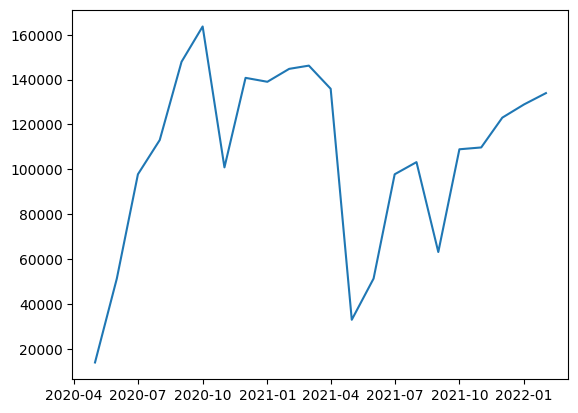

In [35]:
import matplotlib.pyplot as plt 
dates = pd.date_range(start=df['Months'].iloc[-1], periods=look_ahead+1, freq='M')
plt.plot(df['Months'], df['Monthly Sales'], label='Current Sales Data')
plt.plot(dates[1:], np.concatenate([df['Monthly Sales'].values[-look_back:], y_pred.flatten()]), label='Predicted Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Sales Forecasting')
plt.legend()
plt.show()

# ***************************************

In [58]:
df.head()

,Months,Monthly Sales,month,year
0,2020-05-01,13865,5,2020
1,2020-06-01,51274,6,2020
2,2020-07-01,97768,7,2020
3,2020-08-01,113033,8,2020
4,2020-09-01,147912,9,2020


In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['scale']=scaler.fit_transform(np.array(df['Monthly Sales']).reshape(-1,1))

In [66]:
df.head()

,Months,Monthly Sales,month,year,scale
0,2020-05-01,13865,5,2020,0.000000
1,2020-06-01,51274,6,2020,0.249741
2,2020-07-01,97768,7,2020,0.560134
3,2020-08-01,113033,8,2020,0.662042
4,2020-09-01,147912,9,2020,0.894894


In [67]:
def next_batch(training_data, batch_size, steps):
    
    # Grab a random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps) 

    # Create Y data for time series in the batches
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)
    
    x_batch = y_batch[:, :-1].reshape(-1, steps, 1)    # Date  Shape Batch Timestep inputdim
    y_batch = y_batch[:, 1:].reshape(-1, steps, 1)     # Price STock
    return x_batch , y_batch 

In [68]:
import tensorflow as tf
num_inputs = 1
num_time_steps = 12
num_neurons = 100
num_outputs = 1
learning_rate = 0.01 
num_train_iterations = 4000
batch_size = 1

X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

AttributeError: module 'tensorflow' has no attribute 'placeholder'